In [1]:
import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import os
import datasets

In [2]:
import shutil
from datasets import config

cache_dir = config.HF_DATASETS_CACHE
shutil.rmtree(cache_dir, ignore_errors=True)

In [3]:
dfs = { 
    category: datasets.load_dataset(
        'tiginamaria/bug-localization', 
        category,
        split='dev',
        ignore_verifications=True,
    ).to_pandas()
    for category in ['py', 'java', 'kt', 'mixed']
}

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/4339 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/2526 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/618 [00:00<?, ? examples/s]

/home/tigina/bug-localization/venv/lib/python3.10/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/2321 [00:00<?, ? examples/s]

In [4]:
repos_columns = ['repo_symbols_count', 'repo_tokens_count', 'repo_lines_count', 'repo_files_without_tests_count']
diff_columns = ['changed_symbols_count', 'changed_tokens_count', 'changed_lines_count', 'changed_files_count', 'changed_files_without_tests_count']
issue_columns = ['issue_symbols_count', 'issue_tokens_count', 'issue_lines_count', 'issue_links_count', 'issue_code_blocks_count']

In [26]:
print("total:", len(dfs['py']) + len(dfs['java']) + len(dfs['kt']) + len(dfs['mixed']))
print("py:", len(dfs['py']))
print("java:", len(dfs['java']))
print("kt:", len(dfs['kt']))
print("mixed:", len(dfs['mixed']))

total: 9804
py: 4339
java: 2526
kt: 618
mixed: 2321


# Python

In [5]:
dfs['py'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,8543,thealgorithms/python/295/289,thealgorithms,python,https://github.com/TheAlgorithms/Python/issues...,https://github.com/TheAlgorithms/Python/pull/295,https://github.com/TheAlgorithms/Python/pull/295,1,fixes,ProjectEuler -- Problem 1 -- solv2.py -- Error,...,191,57,2,1,3,2018-04-16 13:59:32,162825,Python,"{'Python': 2826228, 'Dockerfile': 406}",MIT License
1,5531,electron/electron/8668/8555,electron,electron,https://github.com/electron/electron/issues/8555,https://github.com/electron/electron/pull/8668,https://github.com/electron/electron/pull/8668,1,close,Mac app store build uses non-public APIs,...,539,128,15,0,0,2017-02-13 07:46:55,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
2,5532,electron/electron/8640/8608,electron,electron,https://github.com/electron/electron/issues/8608,https://github.com/electron/electron/pull/8640,https://github.com/electron/electron/pull/8640,1,close,Debug symbols not generated for Release build,...,154,36,1,0,0,2017-02-09 07:53:27,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
3,6847,keras-team/keras/18352/15282,keras-team,keras,https://github.com/keras-team/keras/issues/15282,https://github.com/keras-team/keras/pull/18352,https://github.com/keras-team/keras/pull/18352,1,solve,MobileNetV3 models can't infer the static shape,...,5226,1230,103,3,1,2023-08-18 10:34:29,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0
4,6848,keras-team/keras/17498/17199,keras-team,keras,https://github.com/keras-team/keras/issues/17199,https://github.com/keras-team/keras/pull/17498,https://github.com/keras-team/keras/pull/17498,1,fixes,efficientnetBx model.save() fails due to seria...,...,3215,827,59,1,0,2023-01-30 07:49:59,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0


In [6]:
dfs['py'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,4.339000e+03,4.339000e+03,4.339000e+03,4339.000000
mean,2.093403e+06,4.922930e+05,5.521511e+04,310.847200
std,3.141001e+06,8.868112e+05,8.313211e+04,476.646617
min,3.210000e+02,7.800000e+01,9.000000e+00,1.000000
1%,4.930580e+04,1.108112e+04,1.415980e+03,10.000000
25%,4.439340e+05,9.810600e+04,1.264900e+04,68.000000
50%,8.921410e+05,1.976850e+05,2.466000e+04,141.000000
75%,3.337002e+06,7.645865e+05,8.521250e+04,402.000000
99%,1.275621e+07,3.607108e+06,3.132866e+05,1868.620000
max,9.880201e+07,3.817069e+07,3.077782e+06,12013.000000


In [7]:
dfs['py'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,1907.403319,436.220788,40.528924,2.080203,1.617654
std,3844.456303,1179.952027,68.508824,1.779195,1.430638
min,1.000000,1.000000,1.000000,1.000000,1.000000
1%,32.380000,7.000000,1.000000,1.000000,1.000000
25%,287.000000,64.000000,6.000000,1.000000,1.000000
50%,799.000000,182.000000,17.000000,2.000000,1.000000
75%,2065.500000,462.000000,46.000000,2.000000,2.000000
99%,17632.240000,3813.640000,337.820000,10.000000,8.000000
max,135872.000000,61633.000000,765.000000,20.000000,20.000000


In [8]:
dfs['py'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,1437.426366,397.613505,29.145656,0.752247,0.954598
std,1896.763850,542.844247,36.035745,1.672649,1.218996
min,43.000000,13.000000,1.000000,0.000000,0.000000
1%,73.000000,16.000000,1.000000,0.000000,0.000000
25%,346.500000,85.500000,6.000000,0.000000,0.000000
50%,769.000000,199.000000,18.000000,0.000000,1.000000
75%,1731.000000,467.000000,38.000000,1.000000,1.000000
99%,9294.120000,2761.240000,174.860000,6.000000,5.000000
max,30221.000000,4491.000000,586.000000,56.000000,11.000000


# Java

In [9]:
dfs['java'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,162,square/okhttp/1085/1034,square,okhttp,https://github.com/square/okhttp/issues/1034,https://github.com/square/okhttp/pull/1085,https://github.com/square/okhttp/pull/1085,1,closes,SpdyConnection.pushExecutor has zero keep-aliv...,...,475,105,6,1,0,2014-10-11 14:11:59,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
1,161,square/okhttp/1106/938,square,okhttp,https://github.com/square/okhttp/issues/938,https://github.com/square/okhttp/pull/1106,https://github.com/square/okhttp/pull/1106,1,closes,SpdyConnection synchronization problem in goAway,...,192,43,2,0,0,2014-10-26 14:28:50,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
2,170,square/okhttp/518/184,square,okhttp,https://github.com/square/okhttp/issues/184,https://github.com/square/okhttp/pull/518,https://github.com/square/okhttp/pull/518,1,closes,"OkHttp changes the global SSL context, breaks ...",...,1769,605,27,0,0,2014-02-09 00:24:27,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
3,169,square/okhttp/628/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/628,https://github.com/square/okhttp/pull/628,1,fix,SpdyConnection clears the old settings without...,...,687,152,6,1,0,2014-03-10 21:05:36,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
4,168,square/okhttp/631/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/631,https://github.com/square/okhttp/pull/631,1,fix,SpdyConnection clears the old settings without...,...,687,152,6,1,0,2014-03-11 04:15:42,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0


In [10]:
dfs['java'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.526000e+03,2.526000e+03,2.526000e+03,2526.000000
mean,1.001474e+07,2.003705e+06,2.585671e+05,2193.692795
std,1.995749e+07,4.090736e+06,4.956893e+05,2840.090964
min,3.258600e+04,6.587000e+03,9.920000e+02,12.000000
1%,1.695820e+05,3.594200e+04,4.869500e+03,38.250000
25%,1.578586e+06,3.330290e+05,4.570325e+04,339.250000
50%,4.883106e+06,1.018802e+06,1.355385e+05,1112.000000
75%,1.532868e+07,2.998577e+06,3.950030e+05,4040.750000
99%,3.563932e+07,7.275279e+06,9.515482e+05,7767.250000
max,2.422849e+08,4.924220e+07,6.198704e+06,28101.000000


In [11]:
dfs['java'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000
mean,2448.775930,481.167458,47.154394,2.493666,1.925970
std,4030.811547,781.876142,75.476744,2.456384,1.973804
min,15.000000,3.000000,1.000000,1.000000,1.000000
1%,47.000000,9.000000,1.000000,1.000000,1.000000
25%,390.250000,78.000000,7.000000,1.000000,1.000000
50%,1107.500000,216.500000,21.000000,2.000000,1.000000
75%,2830.750000,557.750000,54.000000,3.000000,2.000000
99%,19962.500000,3989.000000,401.500000,13.000000,11.000000
max,55997.000000,8742.000000,723.000000,22.000000,17.000000


In [12]:
dfs['java'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000
mean,2087.162708,519.823040,39.816310,0.926762,1.004355
std,2665.060139,657.815754,39.099754,1.565652,1.426614
min,45.000000,13.000000,1.000000,0.000000,0.000000
1%,87.250000,19.000000,1.000000,0.000000,0.000000
25%,516.000000,125.250000,11.000000,0.000000,0.000000
50%,1103.000000,270.000000,29.000000,0.000000,1.000000
75%,2459.250000,622.500000,56.000000,1.000000,2.000000
99%,13080.750000,3239.750000,174.500000,7.000000,6.000000
max,21259.000000,4473.000000,325.000000,19.000000,31.000000


# Kotlin

In [13]:
dfs['kt'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,785,airbnb/lottie-android/2078/2077,airbnb,lottie-android,https://github.com/airbnb/lottie-android/issue...,https://github.com/airbnb/lottie-android/pull/...,https://github.com/airbnb/lottie-android/pull/...,1,fixes,Compose: LottieAnimation recomposes on every f...,...,1237,293,21,1,0,2022-05-19 17:45:55,34121,Java,"{'Java': 806601, 'Kotlin': 346277, 'Shell': 22...",Apache License 2.0
1,1638,square/leakcanary/1935/1912,square,leakcanary,https://github.com/square/leakcanary/issues/1912,https://github.com/square/leakcanary/pull/1935,https://github.com/square/leakcanary/pull/1935,1,fixes,View with Application mContext should not be c...,...,393,87,10,1,1,2020-09-18 00:14:32,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
2,1632,square/leakcanary/2144/2137,square,leakcanary,https://github.com/square/leakcanary/issues/2137,https://github.com/square/leakcanary/pull/2144,https://github.com/square/leakcanary/pull/2144,2,fixes,RootViewWatcher onRootViewAdd crashed,...,1770,410,39,0,1,2021-06-29 15:27:41,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
3,1640,square/leakcanary/1913/1896,square,leakcanary,https://github.com/square/leakcanary/issues/1896,https://github.com/square/leakcanary/pull/1913,https://github.com/square/leakcanary/pull/1913,1,fixes,"Android 9 crash in debug build, version leackc...",...,3173,693,48,0,1,2020-08-31 08:26:12,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
4,1639,square/leakcanary/1927/1910,square,leakcanary,https://github.com/square/leakcanary/issues/1910,https://github.com/square/leakcanary/pull/1927,https://github.com/square/leakcanary/pull/1927,1,fixes,InternalAppWatcher.install should check if the...,...,329,85,9,1,1,2020-09-16 16:52:59,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0


In [14]:
dfs['kt'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,6.180000e+02,6.180000e+02,618.000000,618.000000
mean,1.944103e+06,4.253496e+05,51457.872168,545.182848
std,1.677125e+06,3.688581e+05,43284.424227,418.241972
min,3.052600e+04,6.775000e+03,926.000000,13.000000
1%,5.968734e+04,1.368874e+04,1677.720000,20.000000
25%,4.851750e+05,1.028048e+05,14140.750000,143.250000
50%,1.521317e+06,3.208455e+05,41097.000000,525.000000
75%,2.981963e+06,6.577495e+05,79239.250000,858.750000
99%,5.573832e+06,1.227168e+06,145018.500000,1398.960000
max,5.921271e+06,1.299833e+06,154560.000000,1484.000000


In [15]:
dfs['kt'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,2236.380259,475.959547,53.092233,2.705502,1.889968
std,2717.123719,562.576811,66.400920,2.335825,1.861718
min,22.000000,5.000000,1.000000,1.000000,1.000000
1%,55.680000,12.170000,2.000000,1.000000,1.000000
25%,614.000000,122.250000,12.000000,1.000000,1.000000
50%,1315.000000,285.500000,31.000000,2.000000,1.000000
75%,2777.500000,593.500000,67.000000,3.000000,2.000000
99%,14634.760000,2930.980000,346.980000,14.490000,10.000000
max,20314.000000,3744.000000,443.000000,19.000000,15.000000


In [16]:
dfs['kt'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,618.000000,618.000000,618.000000,618.000000,618.000000
mean,1748.603560,422.791262,36.938511,0.472492,1.135922
std,2377.990686,541.894938,31.067127,0.819171,1.189216
min,49.000000,13.000000,1.000000,0.000000,0.000000
1%,75.680000,17.170000,1.000000,0.000000,0.000000
25%,571.250000,144.500000,18.000000,0.000000,0.000000
50%,973.500000,251.000000,31.000000,0.000000,1.000000
75%,1722.750000,437.000000,45.000000,1.000000,2.000000
99%,11879.190000,2682.150000,155.660000,3.000000,5.000000
max,18981.000000,4070.000000,225.000000,9.000000,10.000000


# Mixed

In [17]:
dfs['mixed']

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,5530,electron/electron/11103/11101,electron,electron,https://github.com/electron/electron/issues/11101,https://github.com/electron/electron/pull/11103,https://github.com/electron/electron/pull/11103,1,closes,process.versions does not include new version ...,...,261,71,14,0,0,2017-11-13 06:39:40,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
1,8734,serverless/serverless/4596/4526,serverless,serverless,https://github.com/serverless/serverless/issue...,https://github.com/serverless/serverless/pull/...,https://github.com/serverless/serverless/pull/...,1,fixes,can't invoke scala locally,...,2153,495,42,3,1,2017-12-20 15:37:03,44971,JavaScript,"{'JavaScript': 3650650, 'Java': 42813, 'Shell'...",MIT License
2,9263,textualize/rich/2305/2291,textualize,rich,https://github.com/Textualize/rich/issues/2291,https://github.com/Textualize/rich/pull/2305,https://github.com/Textualize/rich/pull/2305,1,fixes,[BUG] Invalid markup in a ProgressBar causes t...,...,9034,1672,156,0,1,2022-05-27 11:03:19,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
3,9264,textualize/rich/2296/2273,textualize,rich,https://github.com/Textualize/rich/issues/2273,https://github.com/Textualize/rich/pull/2296,https://github.com/Textualize/rich/pull/2296,1,fixes,[BUG] Text wrapping edge case,...,493,117,24,0,3,2022-05-25 11:46:33,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
4,9265,textualize/rich/2294/2284,textualize,rich,https://github.com/Textualize/rich/issues/2284,https://github.com/Textualize/rich/pull/2294,https://github.com/Textualize/rich/pull/2294,1,fixes,IndexError: list index out of range when using...,...,6887,1868,104,0,2,2022-05-25 09:59:53,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,9975,frequenz-floss/frequenz-sdk-python/123/115,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,Duplicate requests to the resampling actor cau...,...,5226,1391,161,0,3,2022-12-19 14:43:38,10,Python,{'Python': 1083685},MIT License
2317,8892,gisaia/arlas-server/785/784,gisaia,arlas-server,https://github.com/gisaia/ARLAS-server/issues/784,https://github.com/gisaia/ARLAS-server/pull/785,https://github.com/gisaia/ARLAS-server/pull/785,1,fix,`checkFields` query param is ignored when PUTi...,...,240,55,4,0,0,2022-05-05 16:15:28,10,Java,"{'Java': 2030791, 'Shell': 34849, 'Mustache': ...",Apache License 2.0
2318,9974,frequenz-floss/frequenz-sdk-python/163/42,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,nox: Tests using `minimum-requirements-ci.txt`...,...,985,211,21,0,0,2023-01-15 17:50:05,10,Python,{'Python': 1083685},MIT License
2319,9973,frequenz-floss/frequenz-sdk-python/445/442,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,OrderedRingBuffer.__len__ returning wrong values,...,789,195,35,0,1,2023-06-16 15:20:57,10,Python,{'Python': 1083685},MIT License


In [18]:
dfs['mixed'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.321000e+03,2.321000e+03,2.321000e+03,2321.000000
mean,1.176019e+07,3.928877e+06,2.171356e+05,1442.489444
std,3.475252e+07,1.317171e+07,4.291935e+05,2402.279025
min,3.745700e+04,8.727000e+03,1.223000e+03,19.000000
1%,1.593620e+05,3.651820e+04,4.863000e+03,41.200000
25%,1.297742e+06,3.163130e+05,2.955400e+04,190.000000
50%,3.236211e+06,9.431210e+05,8.366100e+04,472.000000
75%,1.113897e+07,3.138859e+06,2.264090e+05,1469.000000
99%,1.359847e+08,6.260137e+07,1.729454e+06,10232.400000
max,7.883723e+08,2.256497e+08,8.687912e+06,33644.000000


In [19]:
dfs['mixed'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2.321000e+03,2321.000000,2321.000000,2321.000000,2321.000000
mean,6.189134e+03,1875.723826,90.538130,4.809565,3.796209
std,5.577360e+04,22396.252996,119.557908,3.435227,2.914042
min,5.300000e+01,14.000000,2.000000,2.000000,1.000000
1%,1.358000e+02,36.000000,3.000000,2.000000,1.000000
25%,9.040000e+02,212.000000,19.000000,3.000000,2.000000
50%,2.222000e+03,500.000000,46.000000,4.000000,3.000000
75%,5.248000e+03,1143.000000,111.000000,6.000000,4.000000
99%,3.629580e+04,9321.000000,591.000000,19.000000,16.000000
max,2.493013e+06,837626.000000,764.000000,22.000000,21.000000


In [20]:
dfs['mixed'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000
mean,1570.304610,403.802240,33.194744,0.838001,1.021112
std,2096.832351,523.124615,37.946628,1.529183,1.397653
min,46.000000,13.000000,1.000000,0.000000,0.000000
1%,73.000000,17.000000,1.000000,0.000000,0.000000
25%,419.000000,101.000000,8.000000,0.000000,0.000000
50%,901.000000,222.000000,23.000000,0.000000,1.000000
75%,1864.000000,482.000000,44.000000,1.000000,2.000000
99%,11302.800000,2819.200000,173.800000,6.000000,6.000000
max,19828.000000,3979.000000,459.000000,24.000000,17.000000


In [21]:
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
        table_line = "& " if language != 'Java' else f"{entity} & "
        table_line += f"{language} " if entity != 'issue' else f"{language} & - & - & - & -"
        for column in columns:
            table_line += (" & {} & {} & {:d} & {}".format(
                dfs[category][column].min(), 
                int(dfs[category][column].median()), 
                int(dfs[category][column].mean()),
                dfs[category][column].max()))
        print(table_line + " \\\\")
    print("\midrule")

& Python  & 1 & 141 & 310 & 12013 & 9 & 24660 & 55215 & 3077782 & 78 & 197685 & 492293 & 38170688 \\
project & Java  & 12 & 1112 & 2193 & 28101 & 992 & 135538 & 258567 & 6198704 & 6587 & 1018801 & 2003705 & 49242196 \\
& Kotlin  & 13 & 525 & 545 & 1484 & 926 & 41097 & 51457 & 154560 & 6775 & 320845 & 425349 & 1299833 \\
& Mixed  & 19 & 472 & 1442 & 33644 & 1223 & 83661 & 217135 & 8687912 & 8727 & 943121 & 3928876 & 225649725 \\
\midrule
& Python  & 1 & 1 & 1 & 20 & 1 & 17 & 40 & 765 & 1 & 182 & 436 & 61633 \\
diff & Java  & 1 & 1 & 1 & 17 & 1 & 21 & 47 & 723 & 3 & 216 & 481 & 8742 \\
& Kotlin  & 1 & 1 & 1 & 15 & 1 & 31 & 53 & 443 & 5 & 285 & 475 & 3744 \\
& Mixed  & 1 & 3 & 3 & 21 & 2 & 46 & 90 & 764 & 14 & 500 & 1875 & 837626 \\
\midrule
& Python & - & - & - & - & 1 & 18 & 29 & 586 & 13 & 199 & 397 & 4491 \\
issue & Java & - & - & - & - & 1 & 29 & 39 & 325 & 13 & 270 & 519 & 4473 \\
& Kotlin & - & - & - & - & 1 & 31 & 36 & 225 & 13 & 251 & 422 & 4070 \\
& Mixed & - & - & - & - & 1 & 2

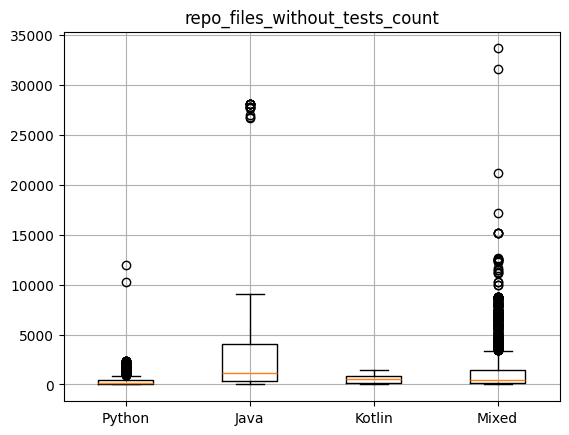

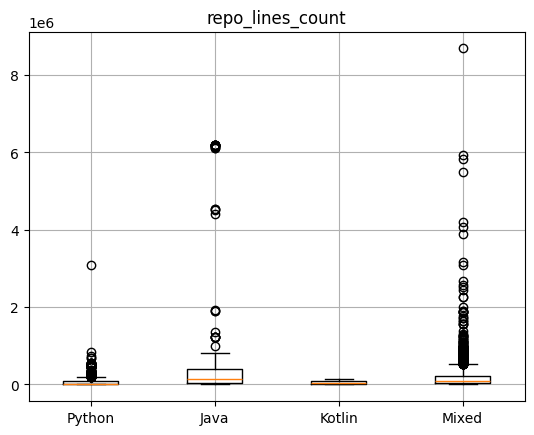

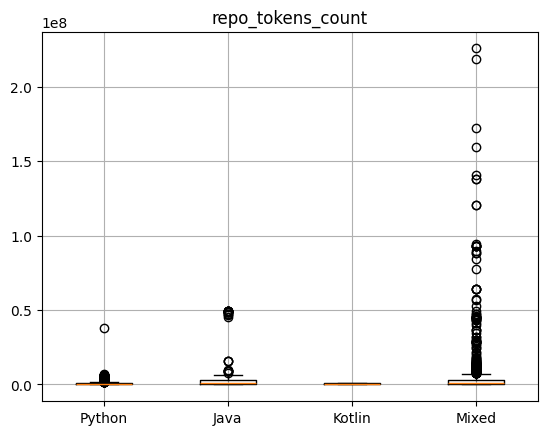

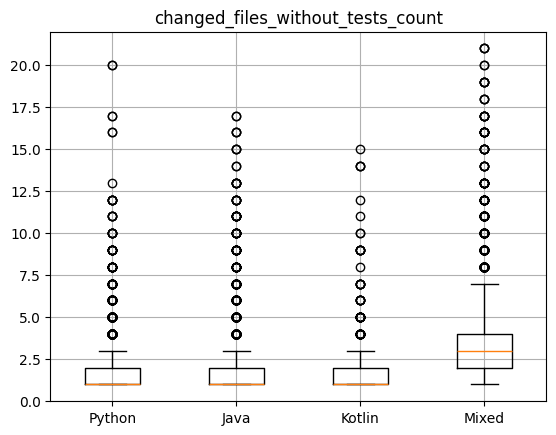

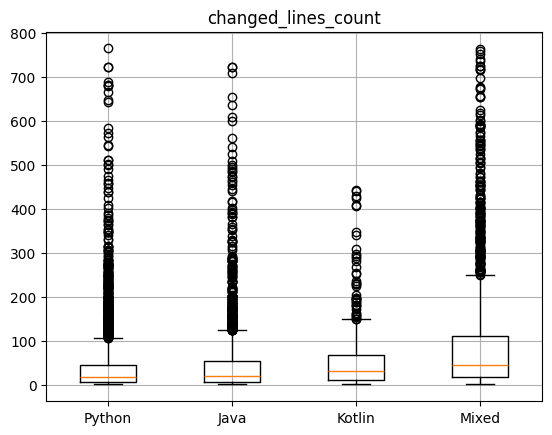

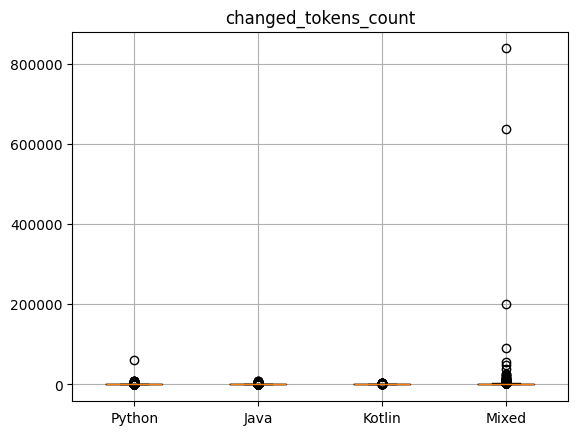

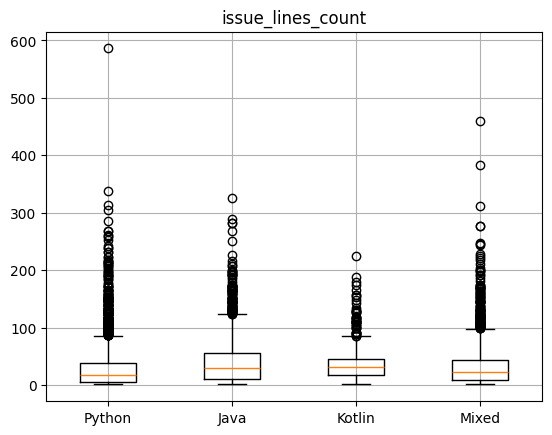

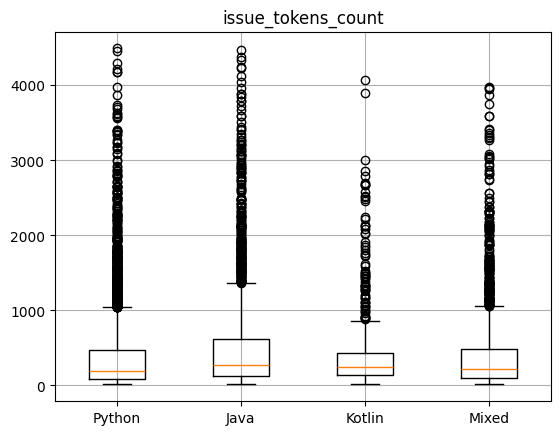

In [22]:
# Combine the arrays in a list
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for column in columns:
        data = []
        xticks = []
        for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
            data.append(dfs[category][column])
            xticks.append(language)
        plt.boxplot(data)
        plt.xticks([1, 2, 3, 4], xticks)
        plt.title(column)
        plt.grid(True)
        plt.show()

In [23]:
ind = dfs['mixed']['changed_lines_count'].idxmax()
print(dfs['mixed'].loc[ind]['diff'])

diff --git a/CHANGELOG.md b/CHANGELOG.md
index ee93f08649..71aa151d15 100644
--- a/CHANGELOG.md
+++ b/CHANGELOG.md
@@ -16,6 +16,7 @@ to [sourceforge feature requests](https://sourceforge.net/p/jabref/features/) by
 
 ### Fixed
 - Changes in customized entry types are now directly reflected in the table when clicking "Apply" or "OK"
+- Reference list generation works for OpenOffice/LibreOffice again, fixes #593
 
 ### Removed
 
diff --git a/src/main/java/net/sf/jabref/JabRefPreferences.java b/src/main/java/net/sf/jabref/JabRefPreferences.java
index 8b99913e33..f67dc4cf64 100644
--- a/src/main/java/net/sf/jabref/JabRefPreferences.java
+++ b/src/main/java/net/sf/jabref/JabRefPreferences.java
@@ -313,6 +313,21 @@ public class JabRefPreferences {
 
     public static final String PUSH_TO_APPLICATION = "pushToApplication";
 
+    // OpenOffice/LibreOffice preferences
+    public static final String OO_EXECUTABLE_PATH = "ooExecutablePath";
+    public static final String OO_PATH = "ooPath";
+